## Agglomerative Clustering on Credit.csv Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc

## Importing the data

In [18]:
X = pd.read_csv('credit.csv')

## Cleaning the data 

In [19]:
# Dropping the CUST_ID column from the data 
X = X.drop('CUST_ID', axis = 1)

# Handling the missing values 
X.fillna(method = 'ffill', inplace = True)

In [21]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)

X_normalized = pd.DataFrame(X_normalized)

/home/afroz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/afroz/.local/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## PCA Dimensionality Reduction 

In [22]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

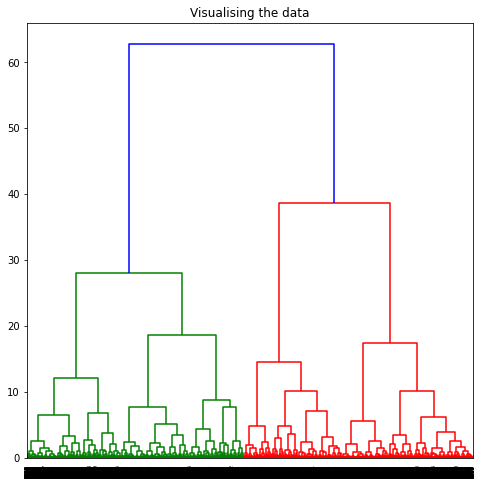

In [23]:
plt.figure(figsize = (8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method = 'ward')))

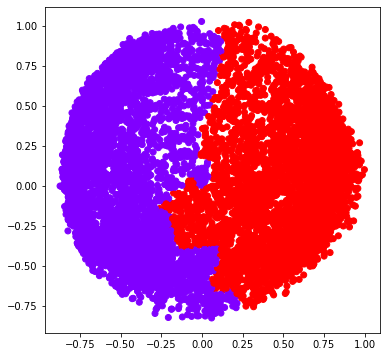

In [24]:
ac2 = AgglomerativeClustering(n_clusters = 2)

plt.figure(figsize = (6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac2.fit_predict(X_principal), cmap = 'rainbow')
plt.show() 

## Agglomerative Clustering on aggl.csv 

In [25]:
# Aggloromative Clustering 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as sch 

In [26]:
dataset = pd.read_csv('aggl.csv')

X = dataset.iloc[:, [3, 4]].values
X

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14],
       [15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14],
       [15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14]])

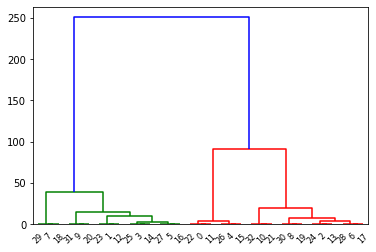

In [27]:
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

In [28]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [29]:
labels

array([2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4, 2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4,
       2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4])